In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import radians, sin, cos, sqrt, atan2
import matplotlib.lines as mlines

## Task 2

### Data Preparation 

In [2]:
stations = pd.read_csv('stations.csv')
stations2 = pd.read_csv('Station dataset.csv')
connections = pd.read_csv('lines2.csv')
routes = pd.read_csv('routes.csv')

In [3]:
routes

,line,name,colour,stripe
0,1,Bakerloo Line,AE6017,NaN
1,3,Circle Line,FFE02B,NaN
2,6,Hammersmith & City Line,F491A8,NaN
3,7,Jubilee Line,949699,NaN
4,11,Victoria Line,0A9CDA,NaN
5,2,Central Line,F15B2E,NaN
6,4,District Line,00A166,NaN
7,5,East London Line,FBAE34,NaN
8,8,Metropolitan Line,91005A,NaN
9,9,Northern Line,000000,NaN


In [4]:
connections

,station1,station2,line,time
0,11,163,1,1
1,11,212,1,2
2,49,87,1,1
3,49,197,1,2
4,82,163,1,2
...,...,...,...,...
401,198,272,11,1
402,198,273,11,3
403,224,260,11,3
404,245,272,11,3


In [5]:
stations2

,ID,Line,Station
0,1,Piccadilly,Hyde Park Corner
1,2,Piccadilly,Green Park
2,3,Piccadilly,Piccadilly Circus
3,4,Piccadilly,Leicester Square
4,5,Piccadilly,Covent Garden
5,6,Piccadilly,Holborn
6,7,Piccadilly,Russell Square
7,8,Bakerloo,Marylebone
8,9,Bakerloo,Regent's Park
9,10,Bakerloo,Oxford Circus


* Piccadilly_line

In [6]:
piccadilly_from = stations2['Station'][0:6]
piccadilly_from_df = pd.DataFrame({'From Station': piccadilly_from})

piccadilly_to = stations2['Station'][1:7]
piccadilly_to_df = pd.DataFrame({'To Station': piccadilly_to}).reset_index()

piccadilly_line = pd.concat([piccadilly_from_df, piccadilly_to_df], axis=1,)
piccadilly_line = piccadilly_line.loc[:,['From Station', 'To Station']]
piccadilly_line


,From Station,To Station
0,Hyde Park Corner,Green Park
1,Green Park,Piccadilly Circus
2,Piccadilly Circus,Leicester Square
3,Leicester Square,Covent Garden
4,Covent Garden,Holborn
5,Holborn,Russell Square


* Bakerloo Line

In [7]:
bakerloo_from = stations2['Station'][7:12]
bakerloo_from_df = pd.DataFrame({'From Station': bakerloo_from}).reset_index()

bakerloo_to = stations2['Station'][8:13]
bakerloo_to_df = pd.DataFrame({'To Station': bakerloo_to}).reset_index()

bakerloo_line = pd.concat([bakerloo_from_df, bakerloo_to_df], axis=1,)
bakerloo_line = bakerloo_line.loc[:,['From Station', 'To Station']]
bakerloo_line

,From Station,To Station
0,Marylebone,Regent's Park
1,Regent's Park,Oxford Circus
2,Oxford Circus,Piccadilly Circus
3,Piccadilly Circus,Charing Cross
4,Charing Cross,Lambeth North


* Central Line

In [8]:
central_from = stations2['Station'][13:19]
central_from_df = pd.DataFrame({'From Station': central_from}).reset_index()

central_to = stations2['Station'][14:20]
central_to_df = pd.DataFrame({'To Station': central_to}).reset_index()

central_line = pd.concat([central_from_df, central_to_df], axis=1,)
central_line = central_line.loc[:,['From Station', 'To Station']]
central_line

,From Station,To Station
0,Lancaster Gate,Marble Arch
1,Marble Arch,Bond Street
2,Bond Street,Oxford Circus
3,Oxford Circus,Tottenham Court Road
4,Tottenham Court Road,Holborn
5,Holborn,Chancery Lane


* Northern Line

In [9]:
northern_from = stations2['Station'][20:25]
northern_from_df = pd.DataFrame({'From Station': northern_from}).reset_index()

northern_to = stations2['Station'][21:]
northern_to_df = pd.DataFrame({'To Station': northern_to}).reset_index()

northern_line = pd.concat([northern_from_df, northern_to_df], axis=1,)
northern_line = northern_line.loc[:,['From Station', 'To Station']]
northern_line

,From Station,To Station
0,Warren Street,Goodge Street
1,Goodge Street,Tottenham Court Road
2,Tottenham Court Road,Leicester Square
3,Leicester Square,Charing Cross
4,Charing Cross,Waterloo


In [10]:
result = pd.merge(stations2, stations, left_on='Station', right_on='name', how='left')
result

,ID,Line,Station,id,latitude,longitude,name,display_name,zone,total_lines,rail
0,1,Piccadilly,Hyde Park Corner,133.0,51.5027,-0.1527,Hyde Park Corner,Hyde<br />Park<br />Corner,1.0,1.0,0.0
1,2,Piccadilly,Green Park,107.0,51.5067,-0.1428,Green Park,Green<br />Park,1.0,3.0,0.0
2,3,Piccadilly,Piccadilly Circus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Piccadilly,Leicester Square,151.0,51.5113,-0.1281,Leicester Square,Leicester<br />Square,1.0,2.0,0.0
4,5,Piccadilly,Covent Garden,60.0,51.5129,-0.1243,Covent Garden,Covent<br />Garden,1.0,1.0,0.0
5,6,Piccadilly,Holborn,126.0,51.5174,-0.1200,Holborn,NaN,1.0,2.0,0.0
6,7,Piccadilly,Russell Square,223.0,51.5230,-0.1244,Russell Square,Russell<br />Square,1.0,1.0,0.0
7,8,Bakerloo,Marylebone,163.0,51.5225,-0.1631,Marylebone,NaN,1.0,1.0,1.0
8,9,Bakerloo,Regent's Park,212.0,51.5234,-0.1466,Regent's Park,Regent's<br />Park,1.0,1.0,0.0
9,10,Bakerloo,Oxford Circus,192.0,51.5150,-0.1415,Oxford Circus,Oxford<br />Circus,1.0,3.0,0.0


In [11]:
result.isnull().sum()

ID              0
Line            0
Station         0
id              2
latitude        2
longitude       2
name            2
display_name    6
zone            2
total_lines     2
rail            2
dtype: int64

In [12]:
result.loc[result['Station'] == "Piccadilly Circus", 'latitude'] = 51.5099
result.loc[result['Station'] == "Piccadilly Circus", 'longitude'] = -0.1343


In [13]:
# final_result = result.loc[result['ID','Line','Station','latitude','longitude' ]]
final_result = result.loc[:, ['ID', 'Line', 'Station', 'latitude', 'longitude']]
final_result


,ID,Line,Station,latitude,longitude
0,1,Piccadilly,Hyde Park Corner,51.5027,-0.1527
1,2,Piccadilly,Green Park,51.5067,-0.1428
2,3,Piccadilly,Piccadilly Circus,51.5099,-0.1343
3,4,Piccadilly,Leicester Square,51.5113,-0.1281
4,5,Piccadilly,Covent Garden,51.5129,-0.1243
5,6,Piccadilly,Holborn,51.5174,-0.1200
6,7,Piccadilly,Russell Square,51.5230,-0.1244
7,8,Bakerloo,Marylebone,51.5225,-0.1631
8,9,Bakerloo,Regent's Park,51.5234,-0.1466
9,10,Bakerloo,Oxford Circus,51.5150,-0.1415


### Visualization and Design

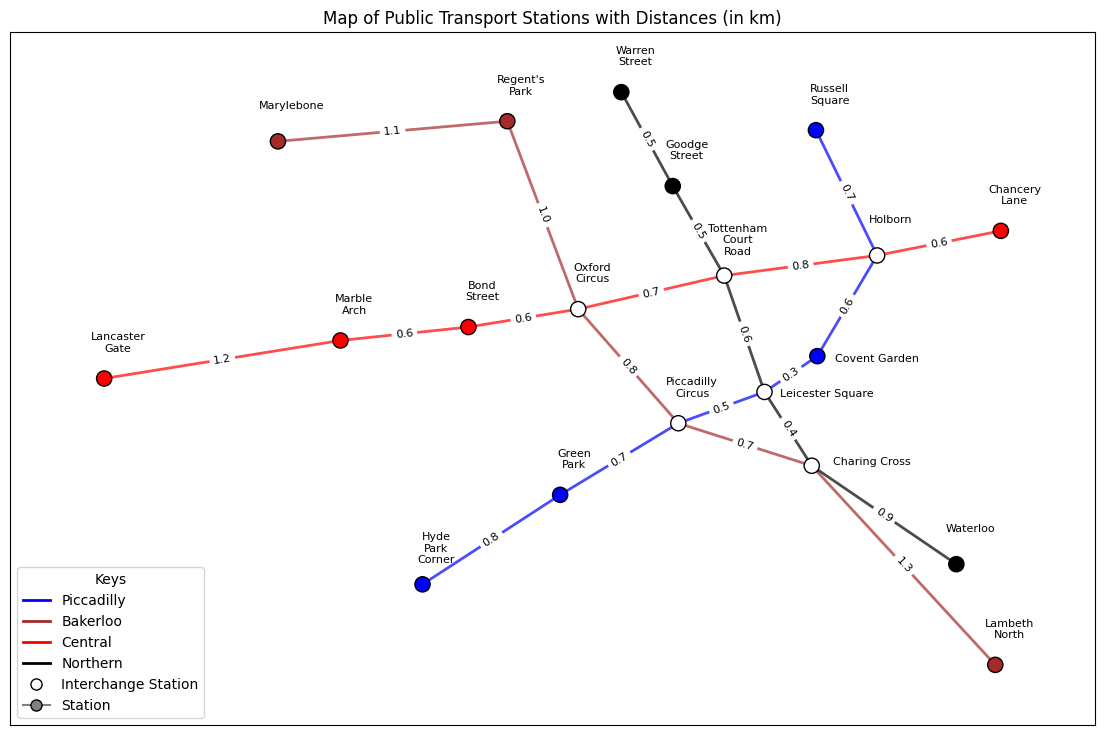

In [ ]:
# Initialize the graph and configurations
G = nx.DiGraph()

station_positions = {}
line_colors = {'Piccadilly': 'blue', 'Bakerloo': 'brown', 'Central': 'red', 'Northern': 'black'}
interchange_stations = {"Oxford Circus", "Tottenham Court Road", "Holborn", "Leicester Square", "Piccadilly Circus", "Charing Cross"}
label_adjustments = {
    "Covent Garden": (0.0033, -0.0017),
    "Leicester Square": (0.0035, -0.0017),
    "Charing Cross": (0.0033, -0.0014)
}

# Add nodes to the graph with positions
for _, row in final_result.iterrows():
    G.add_node(row["Station"], pos=(row["longitude"], row["latitude"]))
    station_positions[row["Station"]] = (row["longitude"], row["latitude"])

# Add edges to the graph with weights (distances) and colors
for df, line_name in zip([piccadilly_line, bakerloo_line, central_line, northern_line], line_colors.keys()):
    color = line_colors[line_name]
    for _, row in df.iterrows():
        from_station = row['From Station']
        to_station = row['To Station']
        
        # Calculate distance using Haversine formula
        from_coords = station_positions[from_station]
        to_coords = station_positions[to_station]
        R = 6371.0  # Earth radius in kilometers
        dlat = radians(to_coords[1] - from_coords[1])
        dlon = radians(to_coords[0] - from_coords[0])
        a = sin(dlat / 2)**2 + cos(radians(from_coords[1])) * cos(radians(to_coords[1])) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c

        # Add edge to graph
        G.add_edge(from_station, to_station, color=color, weight=distance)

# Assign colors to nodes based on interchange or line membership
node_colors = []
for node in G.nodes():
    if node in interchange_stations:
        node_colors.append("white")  # Interchange station color
    else:
        for line_name, line_df in zip(line_colors.keys(), [piccadilly_line, bakerloo_line, central_line, northern_line]):
            if node in line_df.values:
                node_colors.append(line_colors[line_name])
                break

# Adjust label positions to avoid overlapping
pos = {station: (lon, lat) for station, (lon, lat) in nx.get_node_attributes(G, 'pos').items()}
label_pos = {station: (lon + 0.001, lat + 0.0016) for station, (lon, lat) in pos.items()}
for station, (dx, dy) in label_adjustments.items():
    if station in label_pos:
        label_pos[station] = (label_pos[station][0] + dx, label_pos[station][1] + dy)

# Create edge labels for distances
edge_labels = {(u, v): f"{data['weight']:.1f}" for u, v, data in G.edges(data=True)}

# Break long labels for stations except specific ones
exclude_labels = {"Leicester Square", "Covent Garden", "Charing Cross"}
labels = {}
for node in G.nodes():
    label = node
    words = label.split()
    if len(words) >= 2 and label not in exclude_labels:
        labels[node] = '\n'.join(words)  # Break into multiple lines
    else:
        labels[node] = label

# Draw the transport network
fig, ax = plt.subplots(figsize=(14, 9))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos, node_size=120, node_color=node_colors, edgecolors="black", linewidths=1, ax=ax
)

# Draw edges with colors
edges = G.edges(data=True)
edge_colors = [edge[2]["color"] for edge in edges]
nx.draw_networkx_edges(G, pos, width=2, alpha=0.7, edge_color=edge_colors, arrows=False, ax=ax)

# Draw edge labels (distances)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)

# Draw node labels
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=8, font_color="black", ax=ax)

# Add legends
legend_lines = [
    mlines.Line2D([], [], color=color, linewidth=2, label=line_name)
    for line_name, color in line_colors.items()
]
legend_nodes = [
    mlines.Line2D([], [], color="white", marker="o", markersize=8, label="Interchange Station", markeredgecolor="black"),
    mlines.Line2D([], [], color="gray", marker="o", markersize=8, label="Station", markeredgecolor="black"),
]
ax.legend(
    handles=legend_lines + legend_nodes,
    title="Keys",
    loc="lower left",
)

# Add title and show the graph
plt.title("Map of Public Transport Stations with Distances (in km)")
plt.margins(0.05)
plt.show()